In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from pandas_datareader.famafrench import get_available_datasets
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse, meanabs
import statsmodels.api as sms
from statsmodels.stats import diagnostic as dia

In [ ]:
tickers_list = ["SPY", "AAPL", "AMZN", "MSFT", "GOOGL"]

# Fetch the stock data
import yfinance as yf
data = yf.download(tickers_list,'2015-1-1', '2023-12-31')['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,SPY
Date,,,,,
2015-01-02,24.435274,15.4260,26.477501,40.378052,174.265350
2015-01-05,23.746891,15.1095,25.973000,40.006748,171.118134
2015-01-06,23.749125,14.7645,25.332001,39.419579,169.506409
2015-01-07,24.082136,14.9210,25.257500,39.920414,171.618607
2015-01-08,25.007431,15.0230,25.345501,41.094780,174.663986


In [ ]:
# Calculating the returns of the stocks.
returns = np.log(data/data.shift(1))

In [ ]:
# Dropping the first row with NAN values
returns.drop('2015-01-02', axis = 0, inplace=True)

### **Modelling**

In [ ]:
# Fitting a simple CAPM model
simple = sm.ols(formula = 'AMZN ~ SPY', data = returns).fit()
print(simple.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     1469.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.03e-248
Time:                        16:33:31   Log-Likelihood:                 6112.3
No. Observations:                2263   AIC:                        -1.222e+04
Df Residuals:                    2261   BIC:                        -1.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.476      0.1

In [ ]:
# Fitting a multiple linear regression model with 5 related stocks.
model = sm.ols(formula = 'AMZN ~ SPY + AAPL + GOOGL + MSFT', data = returns).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     592.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:33:31   Log-Likelihood:                 6358.2
No. Observations:                2263   AIC:                        -1.271e+04
Df Residuals:                    2258   BIC:                        -1.268e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.728      0.4

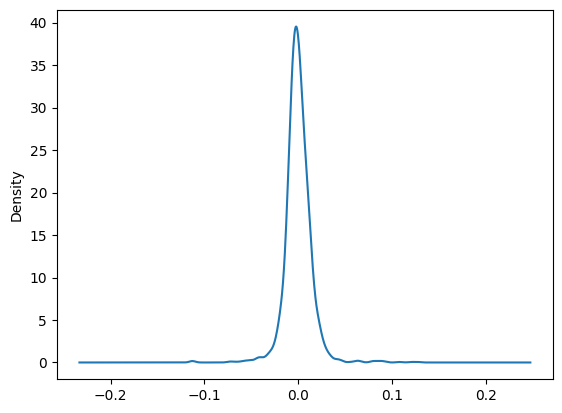

In [ ]:
# Plotting the residuals. Follows a Normal Distribution
plt.figure()
model.resid.plot.density()
plt.show()

In [ ]:
# Reading Fama Factors data for the specified time period.
start = pd.Timestamp('2015-01-05')
end = pd.Timestamp('2023-12-31')

ff_factor = 'F-F_Research_Data_5_Factors_2x3_daily'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start=start, end=end)[0]

<ipython-input-8-3f25a60680fc>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factor_data = web.DataReader(ff_factor, 'famafrench', start=start, end=end)[0]


In [ ]:
ff_factor_data.rename(columns = {'Mkt-RF':'MKT'}, inplace=True)

In [ ]:
# Creating a combined dataframe that has both stock returns and FAMA Factors
combined = pd.concat([returns, ff_factor_data], axis=1)

In [ ]:
# Fama-French 3-factor model
fama3_model = sm.ols(formula = 'AMZN~MKT+SMB+HML', data = combined).fit()
print(fama3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     814.7
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:33:42   Log-Likelihood:                 6375.5
No. Observations:                2263   AIC:                        -1.274e+04
Df Residuals:                    2259   BIC:                        -1.272e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.447      0.1

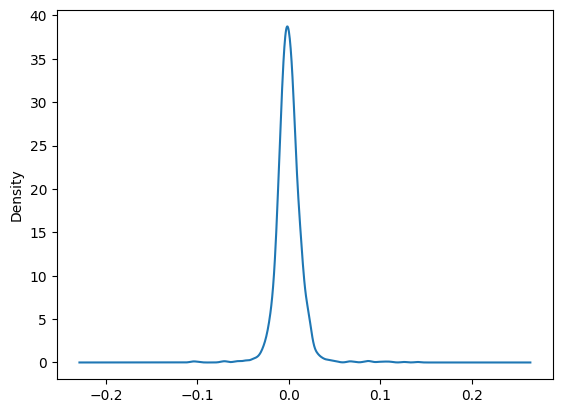

In [ ]:
# Plotting residuals. Follows a normal distribution.
plt.figure()
fama3_model.resid.plot.density()
plt.show()

In [ ]:
# Fama-French 5-factor model.
fama5_model = sm.ols(formula = 'AMZN~MKT+SMB+HML+RMW+CMA', data = combined).fit()
print(fama5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     562.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:33:43   Log-Likelihood:                 6460.8
No. Observations:                2263   AIC:                        -1.291e+04
Df Residuals:                    2257   BIC:                        -1.288e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.706      0.0

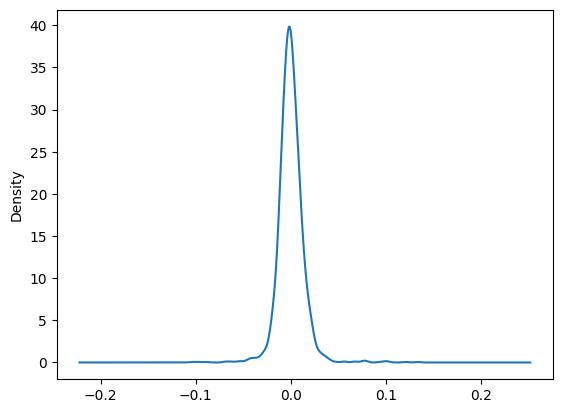

In [ ]:
# Plotting residuals. Follows a normal distribution.
plt.figure()
fama5_model.resid.plot.density()
plt.show()

In [ ]:
# Combined model with all stock returns and Fama factors.
combined_model = sm.ols(formula = 'AMZN~MKT+SMB+HML+RMW+CMA+AAPL+GOOGL+MSFT', data = combined).fit()
print(combined_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     389.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:33:44   Log-Likelihood:                 6527.3
No. Observations:                2263   AIC:                        -1.304e+04
Df Residuals:                    2254   BIC:                        -1.299e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.381      0.1

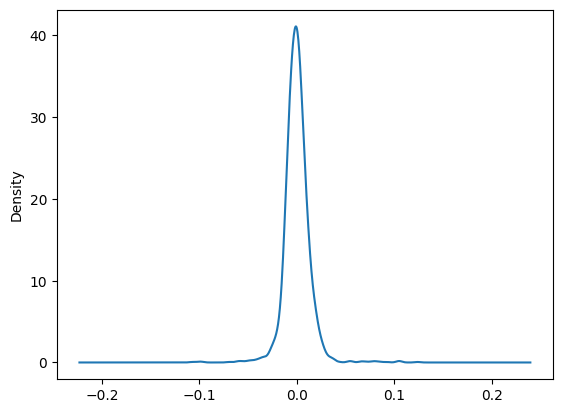

In [ ]:
# Plotting the residuals. Follows a normal distribution.
plt.figure()
combined_model.resid.plot.density()
plt.show()

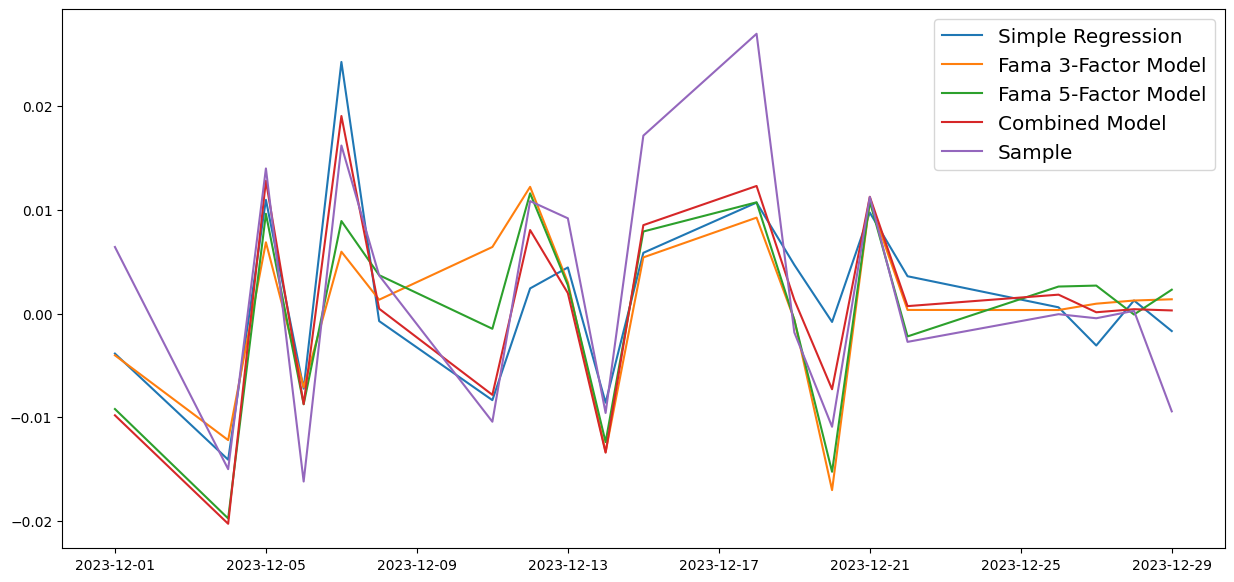

In [ ]:
# Plotting the last 20 return points predicted by each model along with the actual returns.
result = pd.DataFrame({'simple regression': model.predict()[-20:],
                       'fama3_french': fama3_model.predict()[-20:],
                       'fama5_french': fama5_model.predict()[-20:],
                       'combined': combined_model.predict()[-20:],
                       'sample': combined["AMZN"]}, index = combined.index[-20:])

# Feel free to adjust the chart size
plt.figure(figsize=(15, 7.0))
plt.plot(result['2023-12-01':'2023-12-29'].index, result.loc['2023-12-01':'2023-12-29', 'simple regression'], label='Simple Regression')
plt.plot(result['2023-12-01':'2023-12-29'].index, result.loc['2023-12-01':'2023-12-29', 'fama3_french'], label='Fama 3-Factor Model')
plt.plot(result['2023-12-01':'2023-12-29'].index, result.loc['2023-12-01':'2023-12-29', 'fama5_french'], label='Fama 5-Factor Model')
plt.plot(result['2023-12-01':'2023-12-29'].index, result.loc['2023-12-01':'2023-12-29', 'combined'], label='Combined Model')
plt.plot(result['2023-12-01':'2023-12-29'].index, result.loc['2023-12-01':'2023-12-29', 'sample'], label='Sample')
plt.legend(fontsize="x-large")
plt.show()

##**Testing**

In [ ]:
# Getting the stock data from 2024 for testing.
test_data = yf.download(tickers_list,'2023-12-29', '2024-3-31')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [ ]:
# Calculating the returns.
test_returns = np.log(test_data/test_data.shift(1))

In [ ]:
# Dropping the first row.
test_returns.drop('2023-12-29', axis=0, inplace=True)

In [ ]:
# Reading the Fama-French factors till end of february. (Latest data available)
start = pd.Timestamp('2024-01-01')
end = pd.Timestamp('2024-02-29')

ff_factor = 'F-F_Research_Data_5_Factors_2x3_daily'
test_factors = web.DataReader(ff_factor, 'famafrench', start=start, end=end)[0]

<ipython-input-21-d01e61541355>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  test_factors = web.DataReader(ff_factor, 'famafrench', start=start, end=end)[0]


In [ ]:
# Combining the data like before.
combined_test = pd.concat([test_returns[test_returns.index <= '2024-02-29'], test_factors], axis=1)
combined_test.rename({'Mkt-RF': 'MKT'}, axis = 1, inplace=True)

In [ ]:
def evaluate(model, test):
  # Function predicts the return for the testing data and the specified model.
  preds = model.predict(test)

  # Prints RMSE and MAE for the predictions.
  print('RMSE: ', rmse(preds, test['AMZN']))
  print('MAE: ', meanabs(preds, test['AMZN']))

  # Plotting the predictions along with the actual returns.
  plt.figure(figsize=(15, 5))
  plt.plot(test.index, preds, label='Predictions')
  plt.plot(test.index, test['AMZN'], label='Actual')
  plt.legend()
  plt.show()

RMSE:  0.011968922194450324
MAE:  0.008103587307020871


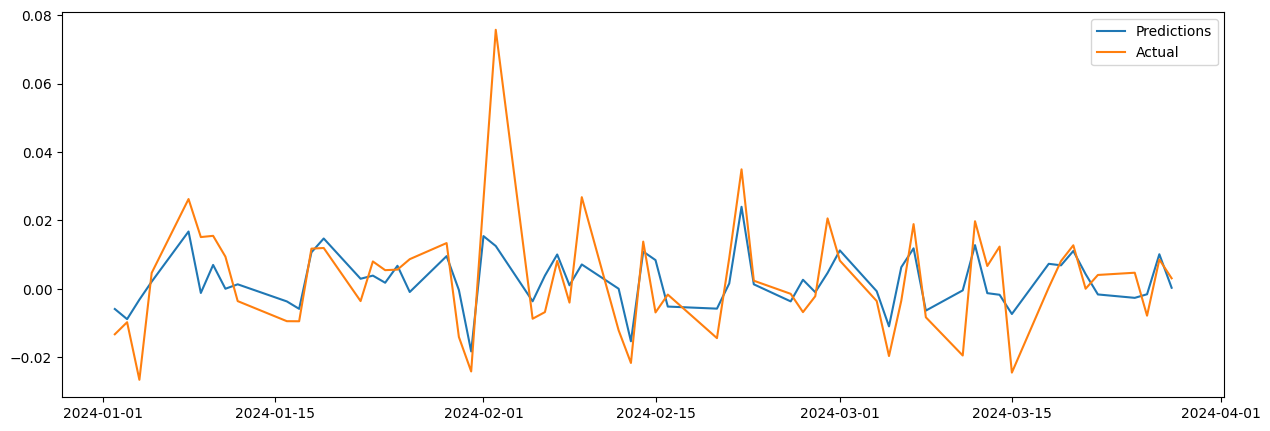

In [ ]:
# CAPM model.
evaluate(simple, test_returns)

RMSE:  0.012457785377893294
MAE:  0.008641230593820074


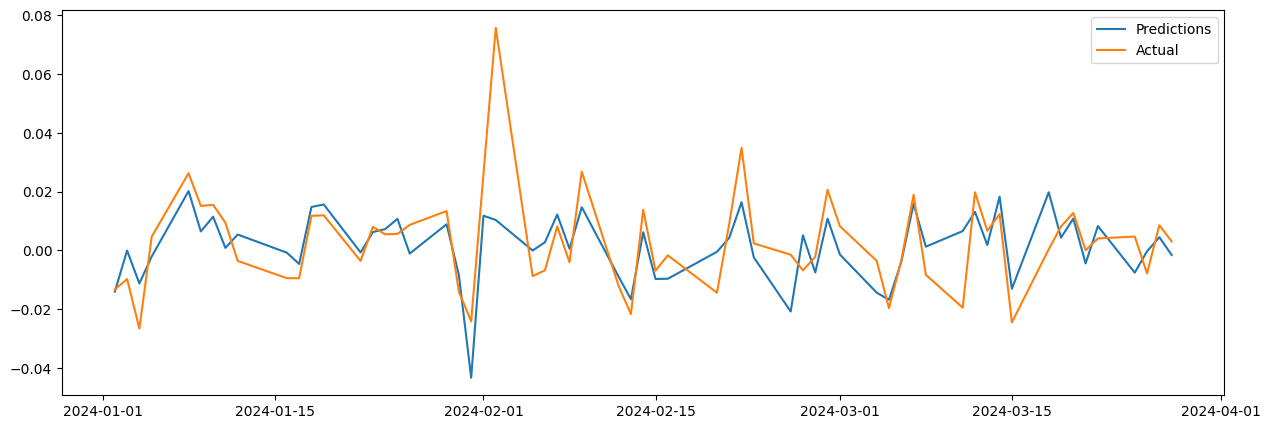

In [ ]:
# MLR with stock returns as regressors.
evaluate(model, test_returns)

RMSE:  0.012037977431325016
MAE:  0.007568929084659277


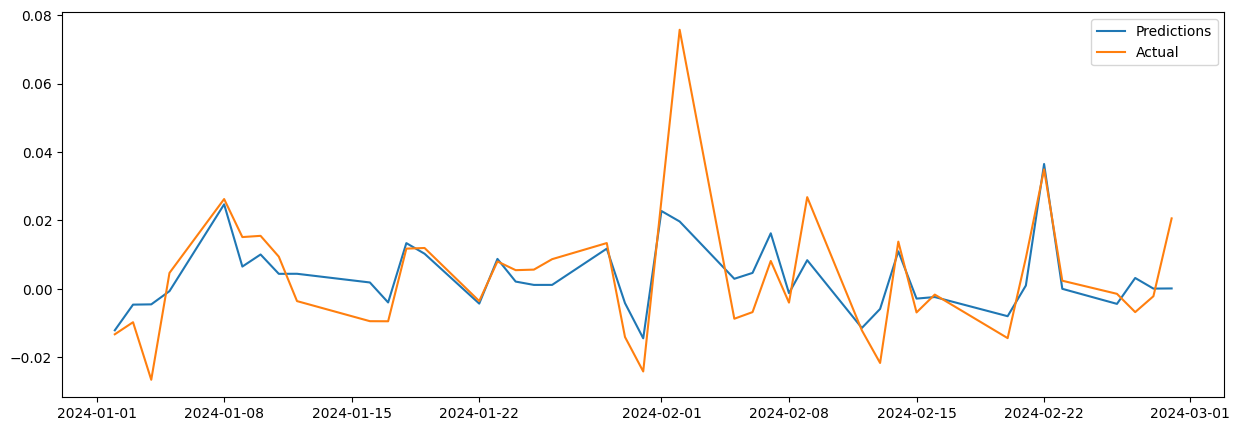

In [ ]:
# Fama-French 3-factor model
evaluate(fama3_model, combined_test)

RMSE:  0.010417745471300779
MAE:  0.007379458321024615


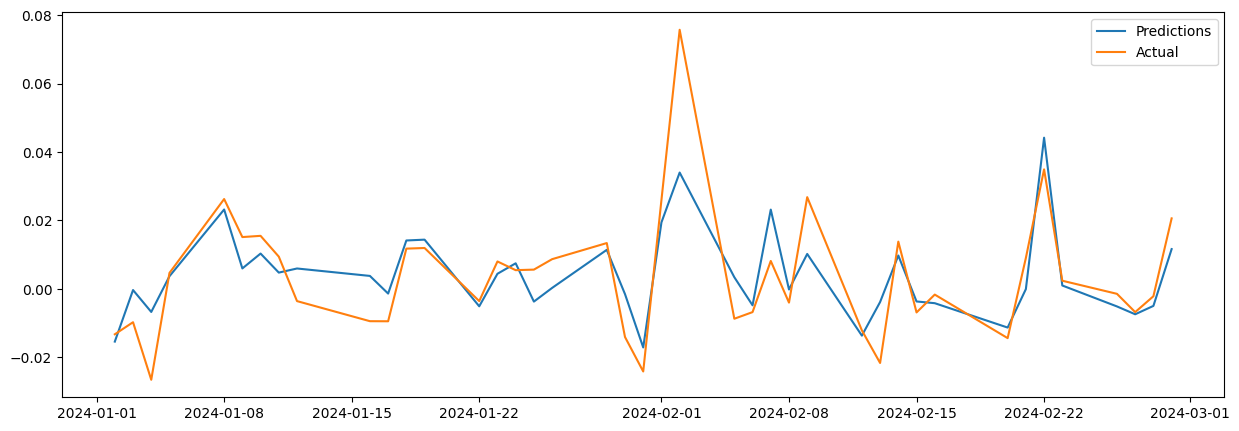

In [ ]:
# Fama-French 5-factor model
evaluate(fama5_model, combined_test)

RMSE:  0.010655247752963951
MAE:  0.007563747740891508


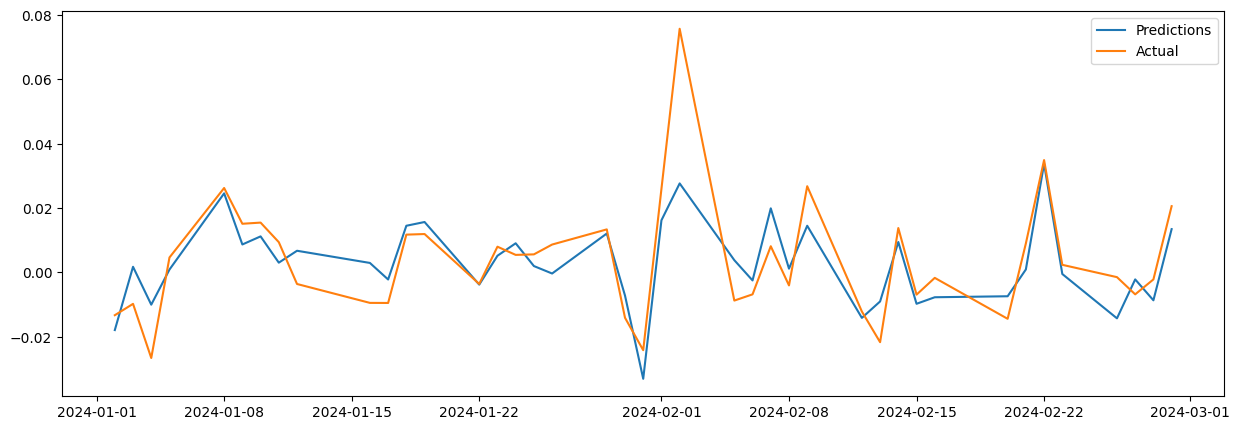

In [ ]:
# Combined model
evaluate(combined_model, combined_test)

### **Homoscedasticity**

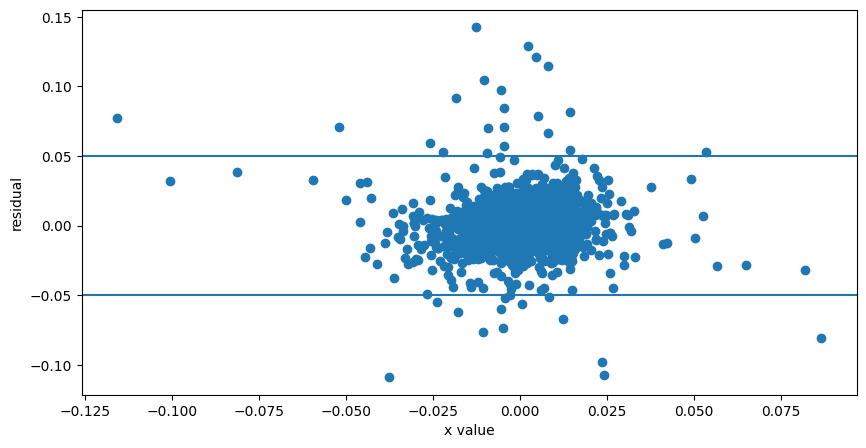

In [ ]:
# Plotting residuals along SPY market returns to look for homoscedasticity
plt.figure(figsize = (10,5))
plt.scatter(returns["SPY"],simple.resid)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('x value')
plt.ylabel('residual')
plt.show()

In [ ]:
def check_heteroscedascticity(model, data):
  # The function prints the P-value from Breusch Pagan model.
  exog_with_const = sms.add_constant(data)
  # Perform Breusch-Pagan test
  het = dia.het_breuschpagan(model.resid, exog_with_const)
  print(f'p-value: {het[-1]}')

In [ ]:
# Simple model
check_heteroscedascticity(simple,combined["SPY"])

p-value: 0.053470205796236306


In [ ]:
# MLR model with stock returns as regressors.
check_heteroscedascticity(model, combined[["SPY", "AAPL", "GOOGL", "MSFT"]])

p-value: 2.300663537304085e-06


In [ ]:
# Fama-French 3-factor model
check_heteroscedascticity(fama3_model, combined[["MKT", "SMB", "HML"]])

p-value: 0.29188877890001347


In [ ]:
# Fama-French 5-factor model
check_heteroscedascticity(fama5_model, combined[["MKT", "SMB", "HML", "RMW", "CMA"]])

p-value: 0.001277192699201745


In [ ]:
# Combined model.
check_heteroscedascticity(combined_model, combined.drop(['AMZN', "SPY"], axis = 1))

p-value: 3.983826922535375e-08


In [ ]:
combined.to_csv('data.csv')

In [ ]:
combined_test.to_csv('test_data.csv')